In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import Point
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import shap
from imblearn.over_sampling import SMOTE

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### New coding for questions:
SAS1: Have you been stopped? \
SAS11: Were they polite? \
SAS12: Were they respectful? \
SAS13: Did they explain why? \
SAS14: What was your opinion before being SaS \
SAS15: How did opinion change \
SAS2: Do you know someone that has been SaS'd \
SAS21: What is their opinion? \
SAS3: Should police do SAS? \
SAS31: Do you think they do SaS fairly in your area?


In [4]:
df_reg = pd.read_csv(r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\PAS SaS with Proportions.csv")

Columns (8,9,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.


In [5]:
df_reg = df_reg.drop(columns= ["Unnamed: 0.1","Unnamed: 0"])

In [6]:
df_columns = ['Age', 'Employment', 'Ethnicity', 'FinancialYear', 'Borough', 'SAS1',
       'SAS11', 'SAS12', 'SAS13', 'SAS14', 'SAS15', 'SAS2', 'SAS21', 'SAS3', 'SAS31',
        'MPS Trust', 'Good Job','Well informed',
       '"Good Job" local_proportion', 'Contact ward officer_proportion',
       'Informed local_proportion', 'Listen to concerns_proportion',
       'Relied on to be there_proportion', 'Treat everyone fairly_proportion',
       'Trust MPS_proportion', 'Understand issues_proportion']

In [7]:
for i in df_columns:
    print(df_reg[f'{i}'].value_counts())

Age
65+      15971
35-44    15836
25-34    14976
45-54    11261
55-64     8967
16-24     7397
Name: count, dtype: int64
Employment
Full-time       32739
Retired         16306
Part-time        9977
Unemployed       6209
House person     4508
Student          4475
Name: count, dtype: int64
Ethnicity
White    47990
Asian    12106
Black     9093
Other     4666
Name: count, dtype: int64
FinancialYear
2016/17    12699
2015/16    12657
2018/19    12649
2017/18    12625
2019/20    12190
2020/21    11791
Name: count, dtype: int64
Borough
Richmond upon Thames      2351
Bexley                    2349
Havering                  2349
Harrow                    2348
Barking and Dagenham      2344
Redbridge                 2341
Barnet                    2341
Sutton                    2341
Wandsworth                2339
Islington                 2338
Hammersmith and Fulham    2337
Newham                    2336
Hillingdon                2334
Southwark                 2334
Ealing                    2333


In [8]:
df_reg.columns

Index(['Age', 'Employment', 'Ethnicity', 'FinancialYear', 'Borough', 'SAS1',
       'SAS14', 'SAS15', 'SAS3', 'SAS31', 'MPS Trust', 'Good Job',
       'Well informed', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21',
       '"Good Job" local_proportion', 'Contact ward officer_proportion',
       'Informed local_proportion', 'Listen to concerns_proportion',
       'Relied on to be there_proportion', 'Treat everyone fairly_proportion',
       'Trust MPS_proportion', 'Understand issues_proportion'],
      dtype='object')

# 1-Classification prediction based of SAS31 **4 ANSWERS** with SAS1-15 and SAS2-21

In [ ]:
df_random_forest1 = df_reg[['SAS1','SAS11', 'SAS12', 'SAS13','SAS2','SAS21','SAS31']].dropna()
df_random_forest1

In [ ]:
predictors_SAS31 = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target_SAS31 = 'SAS31'

In [ ]:
df_encoded = pd.get_dummies(df_random_forest1[predictors_SAS31], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest1[target_SAS31], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model_SAS31 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_SAS31.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_SAS31.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

In [ ]:
feature_importances = rf_model_SAS31.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# 2-Classification prediction based of SAS31 **BINARY ANSWER** with SAS1-15 and SAS2-21

In [ ]:
confidence_mapping = {
    'Fairly confident': 'Confident',
    'Very confident': 'Confident',
    'Not very confident': 'Not Confident',
    'Not at all confident': 'Not Confident'
}

# Create the new column 'SAS31 Binary'
df_random_forest1['SAS31 Binary'] = df_random_forest1['SAS31'].map(confidence_mapping)


In [ ]:
predictors_binary_SAS31 = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target_binary_SAS31 = 'SAS31 Binary'

In [ ]:
df_encoded = pd.get_dummies(df_random_forest1[predictors_binary_SAS31], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest1[target_binary_SAS31], test_size=0.35, random_state=42)

# Initialize the Random Forest model
rf_model_SAS31_binary = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_SAS31_binary.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_SAS31_binary.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

In [ ]:
feature_importances = rf_model_SAS31_binary.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# 3-Logistic Regression based of SAS31 **BINARY ANSWER** with SAS1-15 and SAS2-21

In [ ]:
# Mapping dictionary for SAS31 Binary
confidence_mapping = {
    'Fairly confident': 'Confident',
    'Very confident': 'Confident',
    'Not very confident': 'Not Confident',
    'Not at all confident': 'Not Confident'
}

# Create the new column 'SAS31 Binary'
df_random_forest1['SAS31 Logistic'] = df_random_forest1['SAS31'].map(confidence_mapping)

# Specify the predictor variables and the new binary target variable
predictors = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target = 'SAS31 Binary'

# Encode ordinal variables
ordinal_mappings = {
    'SAS1': {'No': 0, 'Yes': 1},
    'SAS11': {'No': 0, 'Yes': 1},
    'SAS12': {'No': 0, 'Yes': 1},
    'SAS13': {'No': 0, 'Yes': 1},
    'SAS21': {'Negative': -1, 'Mixed': 0, 'Positive': 1}
}

# Apply ordinal encoding
for col, mapping in ordinal_mappings.items():
    df_random_forest1[col] = df_random_forest1[col].map(mapping)

# One-Hot Encode nominal variables if needed
df_encoded = pd.get_dummies(df_random_forest1[predictors], drop_first=True)

# Encode the target variable
le_target = LabelEncoder()
df_random_forest1[target] = le_target.fit_transform(df_random_forest1[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest1[target], test_size=0.35, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get feature importances (coefficients) for logistic regression
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_reg_model.coef_[0])  # Taking absolute value of coefficients
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# 4-Classification prediction based of SAS3 **4 ANSWERS** with SAS1-15 and SAS2-21

In [ ]:
df_random_forest2 = df_reg[['SAS1','SAS11', 'SAS12', 'SAS13','SAS2','SAS21','SAS3']].dropna()
df_random_forest2 = df_random_forest2[df_random_forest2["SAS3"] != "Neither agree nor disagree"]
df_random_forest2

In [ ]:
predictors_SAS3 = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target_SAS3 = 'SAS3'

In [ ]:
df_encoded = pd.get_dummies(df_random_forest2[predictors_SAS3], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest2[target_SAS3], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model_SAS3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_SAS3.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_SAS3.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# 5-Classification prediction based of SAS31 **BINARY** with SAS1-15 and SAS2-21

In [ ]:
agree_mapping = {
    'Strongly agree': 'Agree',
    'Tend to agree': 'Agree',
    'Strongly disagree': 'Disagree',
    'Tend to disagree': 'Disagree'
}

# Create the new column 'SAS31 Binary'
df_random_forest2['SAS3 Binary'] = df_random_forest2['SAS3'].map(agree_mapping)


In [ ]:
predictors_binary_SAS3 = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target_binary_SAS3 = 'SAS3 Binary'

In [ ]:
df_encoded = pd.get_dummies(df_random_forest2[predictors_binary_SAS3], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest2[target_binary_SAS3], test_size=0.25, random_state=42)

# Initialize the Random Forest model
rf_model_SAS3_binary = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_SAS3_binary.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_SAS3_binary.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

feature_importances = rf_model_SAS3_binary.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# 6-Logistic Regression based of SAS31 **BINARY** with SAS1-15 and SAS2-21

In [ ]:
# Specify the predictor variables and the new binary target variable
predictors = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target = 'SAS3 Binary'

# Encode ordinal variables
ordinal_mappings = {
    'SAS1': {'No': 0, 'Yes': 1},
    'SAS11': {'No': 0, 'Yes': 1},
    'SAS12': {'No': 0, 'Yes': 1},
    'SAS13': {'No': 0, 'Yes': 1},
    'SAS21': {'Negative': -1, 'Mixed': 0, 'Positive': 1}
}

# Apply ordinal encoding
for col, mapping in ordinal_mappings.items():
    df_random_forest2[col] = df_random_forest2[col].map(mapping)

# One-Hot Encode nominal variables if needed
df_encoded = pd.get_dummies(df_random_forest2[predictors], drop_first=True)

# Encode the target variable
le_target = LabelEncoder()
df_random_forest2[target] = le_target.fit_transform(df_random_forest2[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest2[target], test_size=0.25, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get feature importances (coefficients) for logistic regression
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_reg_model.coef_[0])  # Taking absolute value of coefficients
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# 7- Classification prediction of SAS1-15 SAS2-21 for Trust, Confidence and Well Informed

In [ ]:
df_random_forest_trust = df_reg[['SAS3','SAS31','MPS Trust']].dropna()
df_random_forest_trust = df_random_forest_trust[df_random_forest_trust["MPS Trust"] != "Neither agree nor disagree"]
trust_mapping = {
    'Tend to agree': 'Agree',
    'Strongly agree': 'Agree',
    'Tend to disagree': 'Disagree',
    'Strongly disagree': 'Disagree'
}

# Create the new column 'SAS31 Binary'
df_random_forest_trust['MPS Trust Binary'] = df_random_forest_trust['MPS Trust'].map(trust_mapping)

predictors_trust = ['SAS3', 'SAS31']
target_trust = ["MPS Trust Binary"]

df_encoded = pd.get_dummies(df_random_forest_trust[predictors_trust], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest_trust[target_trust], test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model_trust = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_trust.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_trust.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


feature_importances = rf_model_trust.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df_random_forest_confidence = df_reg[['SAS3','SAS31','Good Job']].dropna()
confidence_mapping = {
    'Excellent': 'Good',
    'Good': 'Good',
    'Fair': 'Poor',
    'Poor': 'Poor',
    'Very poor': 'Poor'
}

# Create the new column 'SAS31 Binary'
df_random_forest_confidence['Good Job Binary'] = df_random_forest_confidence['Good Job'].map(confidence_mapping)

predictors_confidence = ['SAS3', 'SAS31']
target_confidence = ["Good Job Binary"]

df_encoded = pd.get_dummies(df_random_forest_confidence[predictors_confidence], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest_confidence[target_confidence], test_size=0.4, random_state=42)

# Initialize the Random Forest model
rf_model_confidence = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_confidence.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_confidence.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

feature_importances = rf_model_confidence.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df_random_forest_informed = df_reg[['SAS3','SAS31','Well informed']].dropna()
informed_mapping = {
    'Very well informed': 'Informed',
    'Fairly well informed': 'Informed',
    'Not at all informed': 'Not informed',
}

# Create the new column 'SAS31 Binary'
df_random_forest_informed['Well informed Binary'] = df_random_forest_informed['Well informed'].map(informed_mapping)

predictors_informed = ['SAS3', 'SAS31']
target_informed = ["Well informed Binary"]

df_encoded = pd.get_dummies(df_random_forest_informed[predictors_informed], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest_informed[target_informed], test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model_informed = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_informed.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_informed.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

feature_importances = rf_model_informed.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# 8-Logistic Regression of Trust, Confidence and Informed with Mapped SAS3 and SAS31

In [ ]:
df_reg["SAS3"].value_counts(), df_reg["SAS31"].value_counts()

In [ ]:
df_random_forest_trust = df_reg[['SAS3', 'SAS31', 'MPS Trust']].dropna()
df_random_forest_trust = df_random_forest_trust[df_random_forest_trust["MPS Trust"] != "Neither agree nor disagree"]

trust_mapping = {
    'Tend to agree': 'Agree',
    'Strongly agree': 'Agree',
    'Tend to disagree': 'Disagree',
    'Strongly disagree': 'Disagree'
}

# Create the new column 'MPS Trust Binary'
df_random_forest_trust['MPS Trust Binary'] = df_random_forest_trust['MPS Trust'].map(trust_mapping)

# Map ordinal categories to numeric values
sas3_mapping = {
    'Strongly disagree': 1,
    'Tend to disagree': 2,
    'Neither agree nor disagree': 3,
    'Tend to agree': 4,
    'Strongly agree': 5
}

sas31_mapping = {
    'Not at all confident': 1,
    'Not very confident': 2,
    'Fairly confident': 3,
    'Very confident': 4
}

df_random_forest_trust['SAS3_numeric'] = df_random_forest_trust['SAS3'].map(sas3_mapping)
df_random_forest_trust['SAS31_numeric'] = df_random_forest_trust['SAS31'].map(sas31_mapping)

# Define predictors and target
predictors_trust = ['SAS3_numeric', 'SAS31_numeric']
target_trust = 'MPS Trust Binary'

# Convert target to binary values
df_random_forest_trust['MPS Trust Binary'] = df_random_forest_trust['MPS Trust Binary'].map({'Agree': 1, 'Disagree': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_random_forest_trust[predictors_trust], df_random_forest_trust[target_trust], test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logistic_model_trust = LogisticRegression()

# Train the model
logistic_model_trust.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model_trust.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get the model coefficients
coefficients = logistic_model_trust.coef_[0]
intercept = logistic_model_trust.intercept_

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'Feature': predictors_trust,
    'Coefficient': coefficients
})

# Print coefficients
print("\nLogistic Regression Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept[0]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='royalblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
df_random_forest_confidence = df_reg[['SAS3', 'SAS31', 'Good Job']].dropna()

confidence_mapping = {
    'Excellent': 'Good',
    'Good': 'Good',
    'Fair': 'Poor',
    'Poor': 'Poor',
    'Very poor': 'Poor'
}

# Create the new column 'Good Job Binary'
df_random_forest_confidence['Good Job Binary'] = df_random_forest_confidence['Good Job'].map(confidence_mapping)

# Map ordinal categories to numeric values
sas3_mapping = {
    'Strongly disagree': 1,
    'Tend to disagree': 2,
    'Neither agree nor disagree': 3,
    'Tend to agree': 4,
    'Strongly agree': 5
}

sas31_mapping = {
    'Not at all confident': 1,
    'Not very confident': 2,
    'Fairly confident': 3,
    'Very confident': 4
}

df_random_forest_confidence['SAS3_numeric'] = df_random_forest_confidence['SAS3'].map(sas3_mapping)
df_random_forest_confidence['SAS31_numeric'] = df_random_forest_confidence['SAS31'].map(sas31_mapping)

# Define predictors and target
predictors_confidence = ['SAS3_numeric', 'SAS31_numeric']
target_confidence = 'Good Job Binary'

# Convert target to binary values
df_random_forest_confidence['Good Job Binary'] = df_random_forest_confidence['Good Job Binary'].map({'Good': 1, 'Poor': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_random_forest_confidence[predictors_confidence], df_random_forest_confidence[target_confidence], test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model_confidence = LogisticRegression()

# Train the model
logistic_model_confidence.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model_confidence.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get the model coefficients
coefficients = logistic_model_confidence.coef_[0]
intercept = logistic_model_confidence.intercept_

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'Feature': predictors_confidence,
    'Coefficient': coefficients
})

# Print coefficients
print("\nLogistic Regression Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept[0]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='royalblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming df_reg is your DataFrame
df_random_forest_informed = df_reg[['SAS3', 'SAS31', 'Well informed']].dropna()

informed_mapping = {
    'Very well informed': 'Informed',
    'Fairly well informed': 'Informed',
    'Not at all informed': 'Not informed'
}

# Create the new column 'Well informed Binary'
df_random_forest_informed['Well informed Binary'] = df_random_forest_informed['Well informed'].map(informed_mapping)

# Map ordinal categories to numeric values
sas3_mapping = {
    'Strongly disagree': 1,
    'Tend to disagree': 2,
    'Neither agree nor disagree': 3,
    'Tend to agree': 4,
    'Strongly agree': 5
}

sas31_mapping = {
    'Not at all confident': 1,
    'Not very confident': 2,
    'Fairly confident': 3,
    'Very confident': 4
}

df_random_forest_informed['SAS3_numeric'] = df_random_forest_informed['SAS3'].map(sas3_mapping)
df_random_forest_informed['SAS31_numeric'] = df_random_forest_informed['SAS31'].map(sas31_mapping)

# Define predictors and target
predictors_informed = ['SAS3_numeric', 'SAS31_numeric']
target_informed = 'Well informed Binary'

# Convert target to binary values
df_random_forest_informed['Well informed Binary'] = df_random_forest_informed['Well informed Binary'].map({'Informed': 1, 'Not informed': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_random_forest_informed[predictors_informed], df_random_forest_informed[target_informed], test_size=0.4, random_state=42)

# Initialize the Logistic Regression model
logistic_model_informed = LogisticRegression()

# Train the model
logistic_model_informed.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model_informed.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get the model coefficients
coefficients = logistic_model_informed.coef_[0]
intercept = logistic_model_informed.intercept_

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'Feature': predictors_informed,
    'Coefficient': coefficients
})

# Print coefficients
print("\nLogistic Regression Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept[0]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='royalblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()


# 9- Analysis for ethnicity, age, employment vs Trust and Confidence vs Well informed

In [9]:
df_reg_9 = df_reg[["Age","Employment","Ethnicity","MPS Trust"]].dropna()
df_reg_10 = df_reg[["Age","Employment","Ethnicity","Good Job"]].dropna()
df_reg_11 = df_reg[["Age","Employment","Ethnicity","Well informed"]].dropna()
df_reg_9["MPS Trust"].value_counts()

MPS Trust
Tend to agree                 12605
Strongly agree                 9263
Neither agree nor disagree     1945
Tend to disagree                707
Strongly disagree               359
Name: count, dtype: int64

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


{0: 'Agree', 1: 'Disagree', 2: 'Neither agree nor disagree'}
                            precision    recall  f1-score   support

                     Agree       0.86      0.30      0.45      4239
                  Disagree       0.05      0.42      0.09       253
Neither agree nor disagree       0.08      0.24      0.11       390

                  accuracy                           0.30      4882
                 macro avg       0.33      0.32      0.22      4882
              weighted avg       0.76      0.30      0.40      4882



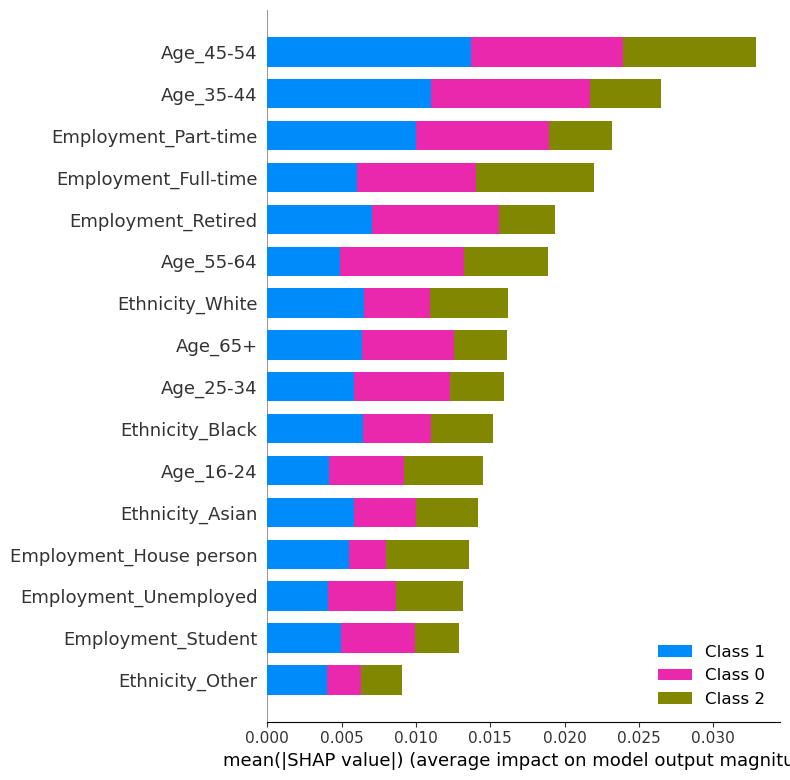

In [10]:
# Assuming your dataframe is already loaded as df_reg_11
data = df_reg_9

# Replace 'Well informed' column values
data["MPS Trust"] = data["MPS Trust"].replace({'Tend to agree': 'Agree', 'Strongly agree': 'Agree', 'Tend to disagree':'Disagree', 'Strongly disagree':'Disagree'})

# Define the binary transformation functions
def age_binary(age):
    if age == '16-24':
        return '25-'
    else:
        return '25+'

def eth_binary(ethnicity):
    if ethnicity == "Black":
        return 'Black'
    else:
        return 'Non-Black'

# Apply the transformations
data['Age_Binary'] = data['Age'].apply(age_binary)
data['Eth_Binary'] = data['Ethnicity'].apply(eth_binary)

# Encode categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[['Ethnicity', 'Age','Employment']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Ethnicity', 'Age','Employment']))

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['MPS Trust'])

class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(class_mapping)
# Combine with the rest of the data
data = data.drop(['Ethnicity', 'Age', 'Employment', 'Eth_Binary', 'Age_Binary'], axis=1)
data = pd.concat([data, encoded_features_df], axis=1)

# Handle missing values for numerical columns (if any)
# Assuming all other columns are numerical
data = data.dropna()

# Define predictors and target
X = data.drop('MPS Trust', axis=1)
y = data['MPS Trust']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(class_weight = "balanced")
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# SHAP values for deeper insight
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, title= "MPS Trust Weights")


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


{0: 'Fair', 1: 'Good', 2: 'Poor'}
              precision    recall  f1-score   support

        Fair       0.25      0.21      0.23      1441
        Good       0.69      0.38      0.49      3953
        Poor       0.07      0.45      0.12       375

    accuracy                           0.34      5769
   macro avg       0.34      0.35      0.28      5769
weighted avg       0.54      0.34      0.40      5769



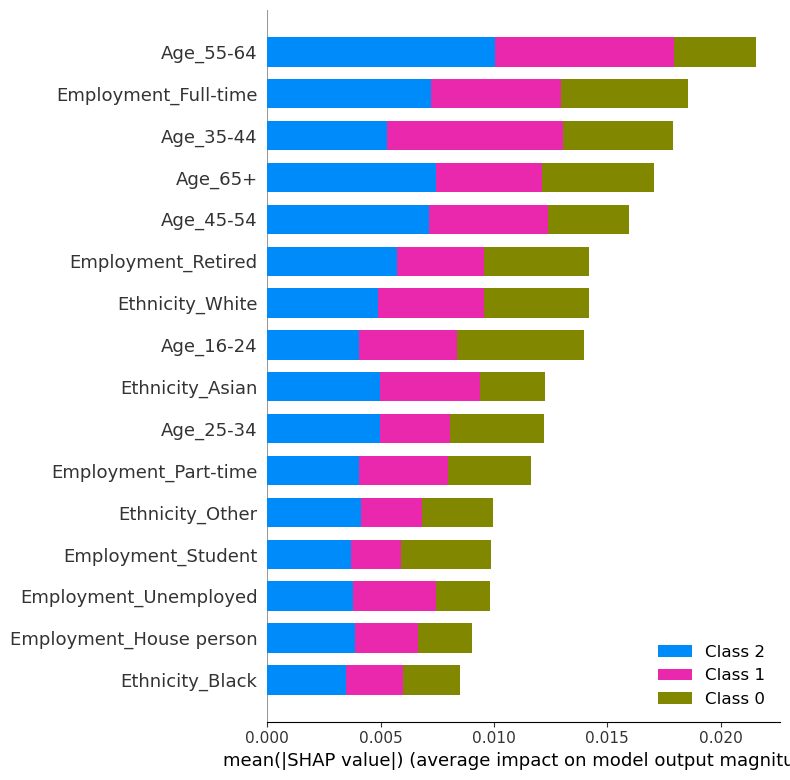

In [11]:
# Assuming your dataframe is already loaded as df_reg_11
data = df_reg_10

# Replace 'Well informed' column values
data['Good Job'] = data['Good Job'].replace({'Excellent': 'Good', 'Very poor': 'Poor'})

# Define the binary transformation functi
def age_binary(age):
    if age == '16-24':
        return '25-'
    else:
        return '25+'

def eth_binary(ethnicity):
    if ethnicity == "Black":
        return 'Black'
    else:
        return 'Non-Black'

# Apply the transformations
data['Age_Binary'] = data['Age'].apply(age_binary)
data['Eth_Binary'] = data['Ethnicity'].apply(eth_binary)

# Encode categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[['Ethnicity', 'Age','Employment']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Ethnicity', 'Age','Employment']))

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Good Job'])

class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(class_mapping)
# Combine with the rest of the data
data = data.drop(['Ethnicity', 'Age', 'Employment', 'Eth_Binary', 'Age_Binary'], axis=1)
data = pd.concat([data, encoded_features_df], axis=1)

# Handle missing values for numerical columns (if any)
# Assuming all other columns are numerical
data = data.dropna()

# Define predictors and target
X = data.drop('Good Job', axis=1)
y = data['Good Job']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model = RandomForestClassifier(class_weight="balanced")
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# SHAP values for deeper insight
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,  title= "Confidence Weights")

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


{0: 'Fairly well informed', 1: 'Not at all informed', 2: 'Very well informed'}
                      precision    recall  f1-score   support

Fairly well informed       0.39      0.23      0.29      1830
 Not at all informed       0.58      0.40      0.47      2669
  Very well informed       0.05      0.35      0.08       244

            accuracy                           0.34      4743
           macro avg       0.34      0.33      0.28      4743
        weighted avg       0.48      0.34      0.38      4743



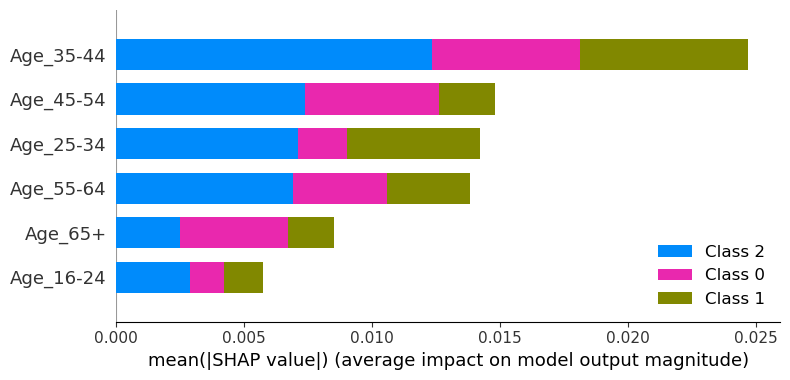

In [13]:
# Assuming your dataframe is already loaded as df_reg_11
data = df_reg_11

# Replace 'Well informed' column values

# Define the binary transformation functi
def age_binary(age):
    if age == '16-24':
        return '25-'
    else:
        return '25+'

def eth_binary(ethnicity):
    if ethnicity == "Black":
        return 'Black'
    else:
        return 'Non-Black'

# Apply the transformations
data['Age_Binary'] = data['Age'].apply(age_binary)
data['Eth_Binary'] = data['Ethnicity'].apply(eth_binary)

# Encode categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[['Age']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Age']))

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Well informed'])

# Check the class mapping
class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(class_mapping)

# Combine with the rest of the data
data = data.drop(['Ethnicity', 'Age', 'Employment', 'Eth_Binary', 'Age_Binary'], axis=1)
data = pd.concat([data, encoded_features_df], axis=1)

# Handle missing values for numerical columns (if any)
# Assuming all other columns are numerical
data = data.dropna()

# Define predictors and target
X = data.drop('Well informed', axis=1)
y = data['Well informed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(class_weight= "balanced")
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# SHAP values for deeper insight
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,  title= "Well informed Weights")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                  Borough                Measure  Average_Proportion
0    Barking and Dagenham       "Good Job" local              0.6190
1    Barking and Dagenham   Contact ward officer              0.1860
2    Barking and Dagenham         Informed local              0.3845
3    Barking and Dagenham     Listen to concerns              0.7205
4    Barking and Dagenham  Relied on to be there              0.7300
..                    ...                    ...                 ...
251            Wandsworth     Listen to concerns              0.7575
252            Wandsworth  Relied on to be there              0.7595
253            Wandsworth  Treat everyone fairly              0.7820
254            Wandsworth              Trust MPS              0.8580
255            Wandsworth      Understand issues              0.7320

[256 rows x 3 columns]


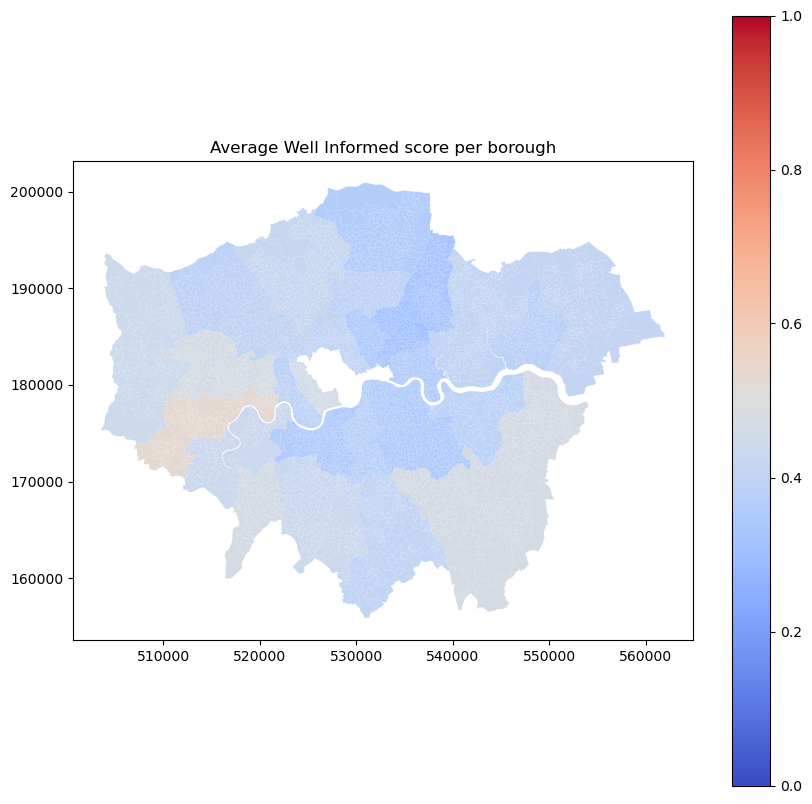

In [22]:

# Clean the measure name to remove invalid characters for filenames
df_grouped_trust_confidence_i = df_grouped_trust_confidence[df_grouped_trust_confidence["Measure"] == "Informed local"]
merged_gdf = shape.merge(df_grouped_trust_confidence_i, left_on='LAD11NM', right_on='Borough')
print(df_grouped_trust_confidence)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='Average_Proportion', cmap='coolwarm', linewidth=0, ax=ax, edgecolor='1', legend=True, vmin=0, vmax=1)

plt.title(f'Average Well Informed score per borough')
plt.show()

# 10 Regression with dummies to get a numerical value

In [6]:
SAS_columns = ["SAS11", "SAS12", "SAS13", "SAS14", "SAS15", "SAS2", "SAS21","SAS3","SAS31",]
df_stopped = df_reg[(df_reg["SAS1"] == "Yes") | (df_reg["SAS2"] == "Yes")]


In [7]:
df_stopped[["SAS11", "SAS12", "SAS13", "SAS14", "SAS15", "SAS2", "SAS21","SAS3","SAS31"]].describe()

,SAS11,SAS12,SAS13,SAS14,SAS15,SAS2,SAS21,SAS3,SAS31
count,2020,2001,1180,1229,1231,3647,3211,4457,5053
unique,2,2,2,3,3,2,3,5,4
top,Yes,Yes,Yes,Generally high,Unchanged,Yes,Negative,Strongly agree,Fairly confident
freq,1431,1518,938,760,969,3278,1441,1775,2174


In [8]:
df_stopped[["SAS11", "SAS12", "SAS13", "SAS14", "SAS15", "SAS2", "SAS21","SAS3","SAS31"]].isna().sum()


SAS11    3626
SAS12    3645
SAS13    4466
SAS14    4417
SAS15    4415
SAS2     1999
SAS21    2435
SAS3     1189
SAS31     593
dtype: int64

In [9]:
df_stopped_imputed = df_stopped.copy()
for i in SAS_columns:
    df_stopped[f'{i}'] = df_stopped[f'{i}'].fillna(df_stopped[f'{i}'].mode()[0])



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Checking for bias when adding data

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Define the columns
SAS_columns = ["SAS11", "SAS12", "SAS13", "SAS14", "SAS15", "SAS2", "SAS21", "SAS3", "SAS31"]
targets = ['"Good Job" local_proportion', 'Contact ward officer_proportion',
           'Informed local_proportion', 'Listen to concerns_proportion',
           'Relied on to be there_proportion', 'Treat everyone fairly_proportion',
           'Trust MPS_proportion', 'Understand issues_proportion']

# Retain only the necessary columns initially
df_stopped_all_columns = df_stopped[SAS_columns + targets]
df_stopped_imputed_all_columns = df_stopped_imputed[SAS_columns + targets]

# Drop rows with NaN in the target columns
df_stopped_cleaned = df_stopped_all_columns.dropna(subset=targets)
df_stopped_imputed_cleaned = df_stopped_imputed_all_columns.dropna(subset=targets)

# One-hot encode the categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_stopped_encoded = pd.DataFrame(encoder.fit_transform(df_stopped_cleaned[SAS_columns]))
df_stopped_encoded.columns = encoder.get_feature_names_out(SAS_columns)

df_stopped_imputed_encoded = pd.DataFrame(encoder.transform(df_stopped_imputed_cleaned[SAS_columns]))
df_stopped_imputed_encoded.columns = encoder.get_feature_names_out(SAS_columns)


# Loop through each target and perform the analysis
for target in targets:
    df_stopped_target = df_stopped_cleaned[target]
    df_stopped_imputed_target = df_stopped_imputed_cleaned[target]
    
    # Original data without imputation
    X_train, X_test, y_train, y_test = train_test_split(df_stopped_encoded, df_stopped_target, test_size=0.2, random_state=42)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'MSE on original data for {target}:', mean_squared_error(y_test, y_pred))
    
    # Imputed data
    X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(df_stopped_imputed_encoded, df_stopped_imputed_target, test_size=0.2, random_state=42)
    model.fit(X_train_imp, y_train_imp)
    y_pred_imp = model.predict(X_test_imp)
    print(f'MSE on imputed data for {target}:', mean_squared_error(y_test_imp, y_pred_imp))


MSE on original data for "Good Job" local_proportion: 0.004875319936473626
MSE on imputed data for "Good Job" local_proportion: 0.004228154218587179
MSE on original data for Contact ward officer_proportion: 0.003697330853737834
MSE on imputed data for Contact ward officer_proportion: 0.003410490873681773
MSE on original data for Informed local_proportion: 0.0051229170363388124
MSE on imputed data for Informed local_proportion: 0.005025971177255073
MSE on original data for Listen to concerns_proportion: 0.004284999127434297
MSE on imputed data for Listen to concerns_proportion: 0.004377713629570837
MSE on original data for Relied on to be there_proportion: 0.0029100236349657595
MSE on imputed data for Relied on to be there_proportion: 0.002615813890831838
MSE on original data for Treat everyone fairly_proportion: 0.007178894590899358
MSE on imputed data for Treat everyone fairly_proportion: 0.007340344460036394
MSE on original data for Trust MPS_proportion: 0.0023232912831258673
MSE on 

MSE on imputed data for "Good Job" local_proportion: 0.004197913135315925


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


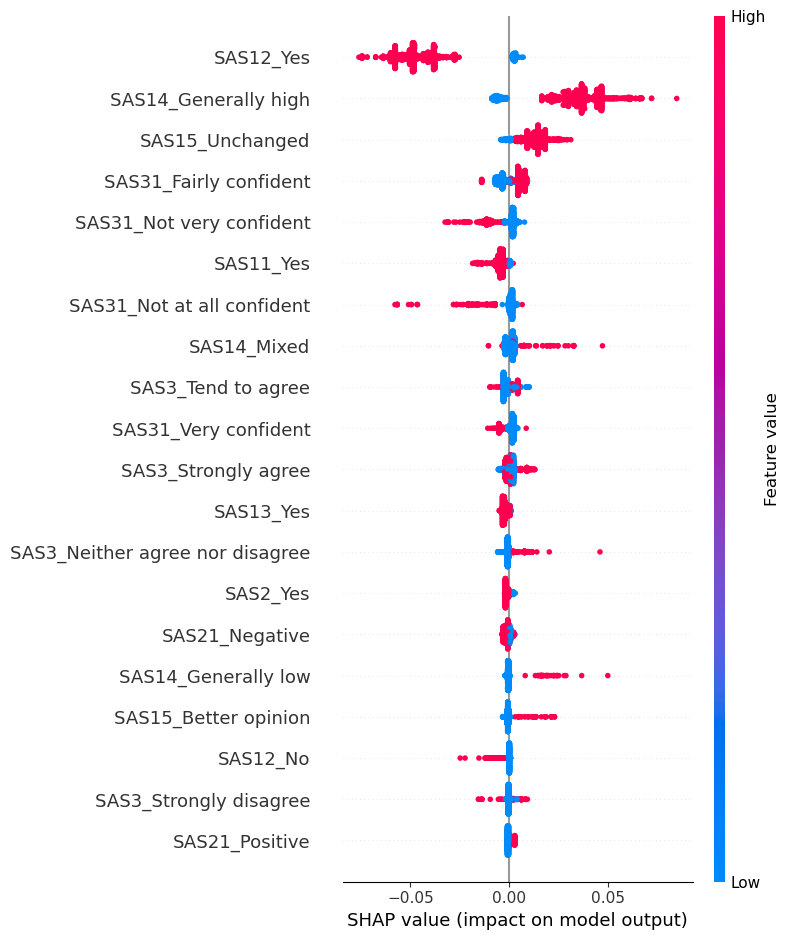

MSE on imputed data for Contact ward officer_proportion: 0.0033844377763934093


KeyboardInterrupt: 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


# Loop through each target and perform the analysis
for target in targets:
    df_stopped_imputed_target = df_stopped_imputed_cleaned[target]
    model = RandomForestRegressor()
    # Imputed data
    X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(df_stopped_imputed_encoded, df_stopped_imputed_target, test_size=0.2, random_state=42)
    model.fit(X_train_imp, y_train_imp)
    y_pred_imp = model.predict(X_test_imp)
    print(f'MSE on imputed data for {target}:', mean_squared_error(y_test_imp, y_pred_imp))
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, title= "MPS Trust Weights")
        